In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/IMDB Dataset.csv')

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
#1.Converting to lower case 

In [7]:
df['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [8]:
df['review'] = df['review'].str.lower()

In [9]:
#removing the html tags.....

In [10]:
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [11]:
df['review'].apply(cleanhtml)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [12]:
df['review'] = df['review'].apply(cleanhtml)

In [13]:
#removing html tags..

In [14]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [15]:
df['review'] = df['review'].apply(remove_URL)

In [16]:
#remove punctuation

In [17]:
from nltk.corpus import stopwords

In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
exclude = string.punctuation

In [21]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',exclude))

In [22]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [23]:
remove_punctuation(df['review'][0])

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [24]:
df['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [25]:
remove_punctuation(df['review'][1])

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [26]:
df['review'] = df['review'].apply(remove_punctuation)

In [27]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [28]:
#Removing stop words

In [29]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
st = stopwords.words('english')

In [31]:
def remove_stopwords(text):
    new = []
    for t in text.split():
        if t in st:
            new.append('')
        else:
            new.append(t)
    return " ".join(new)
            

In [32]:
remove_stopwords(df['review'][0])

'one    reviewers  mentioned   watching  1 oz episode youll  hooked   right    exactly  happened  methe first thing  struck   oz   brutality  unflinching scenes  violence  set  right   word go trust      show   faint hearted  timid  show pulls  punches  regards  drugs sex  violence   hardcore   classic use   wordit  called oz     nickname given   oswald maximum security state penitentary  focuses mainly  emerald city  experimental section   prison    cells  glass fronts  face inwards  privacy   high   agenda em city  home  manyaryans muslims gangstas latinos christians italians irish  moreso scuffles death stares dodgy dealings  shady agreements  never far awayi would say  main appeal   show  due   fact   goes   shows wouldnt dare forget pretty pictures painted  mainstream audiences forget charm forget romanceoz doesnt mess around  first episode  ever saw struck    nasty   surreal  couldnt say   ready      watched   developed  taste  oz  got accustomed   high levels  graphic violence  

In [33]:
remove_stopwords(df['review'][2])

' thought    wonderful way  spend time    hot summer weekend sitting   air conditioned theater  watching  lighthearted comedy  plot  simplistic   dialogue  witty   characters  likable even  well bread suspected serial killer   may  disappointed   realize    match point 2 risk addiction  thought   proof  woody allen  still fully  control   style many  us  grown  lovethis    id laughed  one  woodys comedies  years dare  say  decade  ive never  impressed  scarlet johanson    managed  tone   sexy image  jumped right   average  spirited young womanthis may    crown jewel   career    wittier  devil wears prada   interesting  superman  great comedy  go see  friends'

In [34]:
df['review'].apply(remove_stopwords)

0        one    reviewers  mentioned   watching  1 oz e...
1         wonderful little production  filming techniqu...
2         thought    wonderful way  spend time    hot s...
3        basically theres  family   little boy jake thi...
4        petter matteis love   time  money   visually s...
                               ...                        
49995     thought  movie    right good job  wasnt  crea...
49996    bad plot bad dialogue bad acting idiotic direc...
49997       catholic taught  parochial elementary schoo...
49998    im going    disagree   previous comment  side ...
49999     one expects  star trek movies   high art   fa...
Name: review, Length: 50000, dtype: object

In [35]:
df['review'] = df['review'].apply(remove_stopwords)

In [36]:
df['review'][20]

'  success  die hard   sequels   surprise really    1990s  glut  die hard   movies cashed    wrong guy wrong place wrong time concept       cliffhanger die hard   mountain   time  rescue sly stop   mom  shoot stallones careercliffhanger  one big nitpickers dream especially     expert  mountain climbing basejumping aviation facial expressions acting skills     full  excuses  dismiss  film  one overblown pile  junk stallone even managed  get outacted   horse however    forget   nonsense  actually   lovable  undeniably entertaining romp  delivers  plenty  thrills  unintentionally plenty  laughsyouve got  love john lithgows sneery evilness  tick every box band  baddies  best    permanently harassed  hapless turncoat agent rex linn  travershe may   henry  portrait   serial killer  michael rooker  noteworthy   cringeworthy performance  hal  insists  constantly shrieking  painful disbelief   captors  man never hurt anybody  whilst  surely cant   really  look like ralph waites frank character 

In [37]:
#word tokenizer

In [38]:
from nltk.tokenize import word_tokenize , sent_tokenize

In [39]:
len(word_tokenize(df['review'][1]))

84

In [40]:
def no_of_words(text):
    return len(word_tokenize(text))

In [41]:
no_of_words(df['review'][20])

175

In [42]:
df['no_of_words'] = df['review'].apply(no_of_words)

In [43]:
df

,review,sentiment,no_of_words
0,one reviewers mentioned watching 1 oz e...,positive,168
1,wonderful little production filming techniqu...,positive,84
2,thought wonderful way spend time hot s...,positive,86
3,basically theres family little boy jake thi...,negative,67
4,petter matteis love time money visually s...,positive,125
...,...,...,...
49995,thought movie right good job wasnt crea...,positive,85
49996,bad plot bad dialogue bad acting idiotic direc...,negative,57
49997,catholic taught parochial elementary schoo...,negative,115
49998,im going disagree previous comment side ...,negative,115


In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns

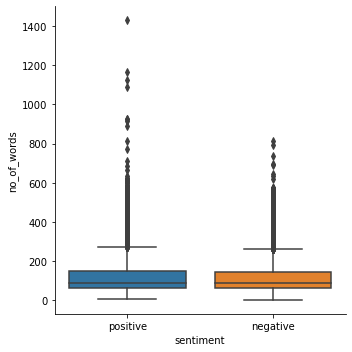

In [45]:
sns.catplot(x='sentiment',y='no_of_words', kind='box' , data=df)

In [46]:
dfp = df[df['sentiment']=='positive']

In [47]:
dfn = df[df['sentiment']=='negative']

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


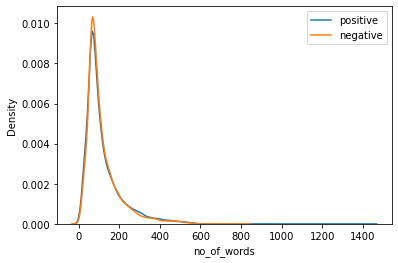

In [48]:
sns.distplot(dfp['no_of_words'],hist=False , label='positive')
sns.distplot(dfn['no_of_words'],hist=False , label='negative')
plt.legend()

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lb = LabelEncoder()

In [51]:
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [52]:
df # 0 stands for negative and 1 stands for positive...

,review,sentiment,no_of_words
0,one reviewers mentioned watching 1 oz e...,1,168
1,wonderful little production filming techniqu...,1,84
2,thought wonderful way spend time hot s...,1,86
3,basically theres family little boy jake thi...,0,67
4,petter matteis love time money visually s...,1,125
...,...,...,...
49995,thought movie right good job wasnt crea...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,57
49997,catholic taught parochial elementary schoo...,0,115
49998,im going disagree previous comment side ...,0,115


In [53]:
df.corr()

,sentiment,no_of_words
sentiment,1.000000,0.014318
no_of_words,0.014318,1.000000


In [54]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [55]:
def stemming(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [56]:
stemming(df['review'][0]) #stemming is not bringing do much change so will not do it for now.....

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
df

,review,sentiment,no_of_words
0,one reviewers mentioned watching 1 oz e...,1,168
1,wonderful little production filming techniqu...,1,84
2,thought wonderful way spend time hot s...,1,86
3,basically theres family little boy jake thi...,0,67
4,petter matteis love time money visually s...,1,125
...,...,...,...
49995,thought movie right good job wasnt crea...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,57
49997,catholic taught parochial elementary schoo...,0,115
49998,im going disagree previous comment side ...,0,115


In [59]:
cv = CountVectorizer(max_features=10000)

In [60]:
X = cv.fit_transform(df['review']).toarray()

In [61]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
X.shape

(50000, 10000)

In [63]:
Y= df['sentiment'].values.reshape(-1,1)

In [64]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)

In [69]:
X_train.shape

(35000, 10000)

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [68]:
gb = GaussianNB()

In [69]:
mnb = MultinomialNB()

In [70]:
mnb.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [71]:
y_pred = mnb.predict(X_test)

In [72]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
print(accuracy_score(y_pred,Y_test))

0.8512666666666666


In [75]:
gb = GaussianNB()

In [76]:
gb.fit(X_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [77]:
yg_pred = gb.predict(X_test)

In [78]:
accuracy_score(yg_pred,Y_test)

0.7399333333333333

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tf = TfidfVectorizer(max_features=10000)

In [82]:
Xt = tf.fit_transform(df['review']).toarray()

In [83]:
Xt_train , Xt_test , Y_train , Y_test = train_test_split(Xt, Y , test_size=0.3)

In [84]:
mnb.fit(Xt_train,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [85]:
y_pred = mnb.predict(Xt_test)

In [86]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [87]:
accuracy_score(y_pred,Y_test)

0.8599333333333333

In [88]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))